<a href="https://colab.research.google.com/github/frankdede/ECE657-A3/blob/master/A3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 3:** Sentiment Analysis on IMDB review dataset

In [134]:
# Importing the required libraries
import tensorflow as tf
import tarfile
import os
import numpy as np
import re
import random
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, Dropout, Embedding
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pickle

In [129]:
# Downloading the stopwords for data preprocessing
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [131]:
# Function to download the data from the website and extracting it
def load_data():
  Imdb_Dataset_raw = tf.keras.utils.get_file(
      fname = "aclImdb_v1.tar",
      origin = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
      extract = True
  )
  Imdb_Dataset_extracted = tarfile.open(Imdb_Dataset_raw)
  Imdb_Dataset_extracted.extractall('./data/')
  Imdb_Dataset_extracted.close()
  

In [132]:
# Call load_data() to load the data
load_data()

84140032/84125825 [==============================] - 3s 0us/step


In [133]:
pos_path = '/content/data/aclImdb/train/pos'
neg_path = '/content/data/aclImdb/train/neg'
  
train_data_pos = [open(os.path.join(pos_path, f)).read() for f in os.listdir(pos_path)]

train_data_neg = [open(os.path.join(neg_path, f)).read() for f in os.listdir(neg_path)]

train_X = np.concatenate((train_data_pos, train_data_neg), axis = 0)
train_y = np.hstack((np.ones(len(train_data_pos)), np.zeros(len(train_data_neg))))


In [102]:
train_X.shape, train_y.shape

((25000,), (25000,))

In [103]:
pos_path = '/content/data/aclImdb/test/pos'
neg_path = '/content/data/aclImdb/test/neg'
  
test_data_pos = [open(os.path.join(pos_path, f)).read() for f in os.listdir(pos_path)]

test_data_neg = [open(os.path.join(neg_path, f)).read() for f in os.listdir(neg_path)]

test_X = np.concatenate((test_data_pos, test_data_neg), axis = 0)
test_y = np.hstack((np.ones(len(test_data_pos)), np.zeros(len(test_data_neg))))

In [104]:
test_X.shape, test_y.shape

((25000,), (25000,))

In [105]:
train_X

array(["Just kidding, I rented 12 Monkeys the other day because I am a huge Bruce Willis fan and I heard some things about the film. Some good and some bad, but it was one of those films you had to pay attention to every second, so I was a bit worried. Just because I felt like for a minute if this was going to be one of those films that I had to watch several times to get. But I watched it last night and I was really impressed, this movie had everything in it: action, drama, sci-fi, history, dark humor, and even a little romance. The actors all did a terrific job, I give a lot of credit to Bruce, during his scene in the car with his psychiatrist, he really got to me. But Brad Pitt, I'm just amazed with how much of a great job he did. He didn't over do his character, who was crazy, and just made it work and was extremely believable. The story was just scary, but very good and a wake up call.<br /><br />James Cole is a man in the future where a virus broke out in the past and killed 5 bi

In [106]:
def data_cleanup(data_raw):
  tokens = re.compile("[.;:!#\'?,\"()\[\]]|(<br\s*/><br\s*/>)|(\-)|(\/)")
  res = [tokens.sub("", d.lower()) for d in data_raw]

  stop_words = set(nltk.corpus.stopwords.words("english"))

  data_cleaned = [r for r in res if r not in stop_words]
    
  return res

In [107]:
train_X_cleaned = data_cleanup(train_X)
test_X_cleaned = data_cleanup(test_X)

Cleaned train data

In [109]:
for i in range(0,5):
  print(train_X_cleaned[i])

just kidding i rented 12 monkeys the other day because i am a huge bruce willis fan and i heard some things about the film some good and some bad but it was one of those films you had to pay attention to every second so i was a bit worried just because i felt like for a minute if this was going to be one of those films that i had to watch several times to get but i watched it last night and i was really impressed this movie had everything in it action drama scifi history dark humor and even a little romance the actors all did a terrific job i give a lot of credit to bruce during his scene in the car with his psychiatrist he really got to me but brad pitt im just amazed with how much of a great job he did he didnt over do his character who was crazy and just made it work and was extremely believable the story was just scary but very good and a wake up calljames cole is a man in the future where a virus broke out in the past and killed 5 billion people and only 1% of the population survi

cleaned test data

In [110]:
for i in range(0,5):
  print(test_X_cleaned[i])

i like full house and step by step the same i dont have a favorite episode i just like certain scenes but some scenes i dont like but i haft to say the reason i started watching this show is because it had suzanne summers in it and my most favorite character was dana and karen could be a snob sometimes but she was good character also i just like to watch family shows instead of trash that has a lot of drugs and violence this show is a lot like other family shows where one of the parents are always strict about curfews and dates other than step by step my other favorite shows are full house sabrina the teenage witch gomer pyle usmc the andy griffith show and dukes of hazzard
an amazing film ive only just seen it and i already want to see it again id never heard of derek jarman before i saw this film but now i am i cant wait to see his others the film takes a whole new perspective of shakespeares the tempest im sure hed have appreciated it for jarmans use of the the plays themes of love 

In [111]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train_X_cleaned)
train_X = tokenizer.texts_to_sequences(train_X_cleaned)
test_X = tokenizer.texts_to_sequences(test_X_cleaned)

In [113]:
train_X = keras.preprocessing.sequence.pad_sequences(train_X,padding='post',maxlen=500)
test_X = keras.preprocessing.sequence.pad_sequences(test_X,padding='post',maxlen=500)

train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [120]:
vocab_size = len(tokenizer.word_index)+1

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 32))
model.add(keras.layers.Conv1D(filters=32,kernel_size=8,padding='valid',activation='relu'))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, None, 32)          4568736   
                                                                 
 conv1d_23 (Conv1D)          (None, None, 32)          8224      
                                                                 
 global_average_pooling1d_6   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_42 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dropout_43 (Dropout)        (None, 32)                0         
                                                     

In [121]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [122]:
history = model.fit(train_X, train_y,
                    epochs=5,
                    validation_data=(test_X, test_y),
                    verbose=1, # print result every epoch
                    batch_size=250)

Epoch 1/5
80/80 [==============================] - 2s 13ms/step - loss: 0.6890 - acc: 0.5430 - val_loss: 0.6603 - val_acc: 0.7176
Epoch 2/5
80/80 [==============================] - 1s 10ms/step - loss: 0.5442 - acc: 0.7613 - val_loss: 0.3641 - val_acc: 0.8788
Epoch 3/5
80/80 [==============================] - 1s 10ms/step - loss: 0.3321 - acc: 0.8781 - val_loss: 0.2820 - val_acc: 0.8926
Epoch 4/5
80/80 [==============================] - 1s 10ms/step - loss: 0.2403 - acc: 0.9197 - val_loss: 0.2623 - val_acc: 0.9000
Epoch 5/5
80/80 [==============================] - 1s 10ms/step - loss: 0.1828 - acc: 0.9406 - val_loss: 0.2610 - val_acc: 0.8990


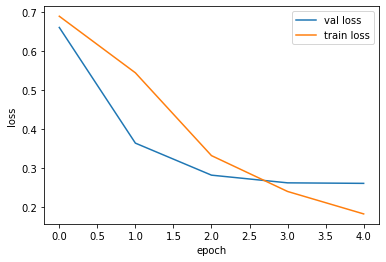

In [123]:
plt.plot(history.history['val_loss'],label="val loss")
plt.plot(history.history['loss'],label="train loss")
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()
plt.show()



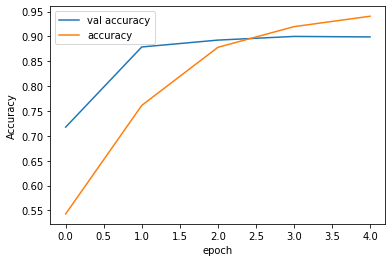

In [124]:
plt.plot(history.history['val_acc'],label="val accuracy")
plt.plot(history.history['acc'],label="accuracy")
plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [127]:
model.save(os.path.join('models','Group_80_NLP_model'))
with open('models/Group_80_NLP_model/NLP_token.pkl', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL )
model.save('models/Group_80_NLP_model')

INFO:tensorflow:Assets written to: models/Group_80_NLP_model/assets
INFO:tensorflow:Assets written to: models/Group_80_NLP_model/assets
